In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
data = pd.read_csv("ex2data1.txt", names=["exam1", "exam2", "admitted"])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


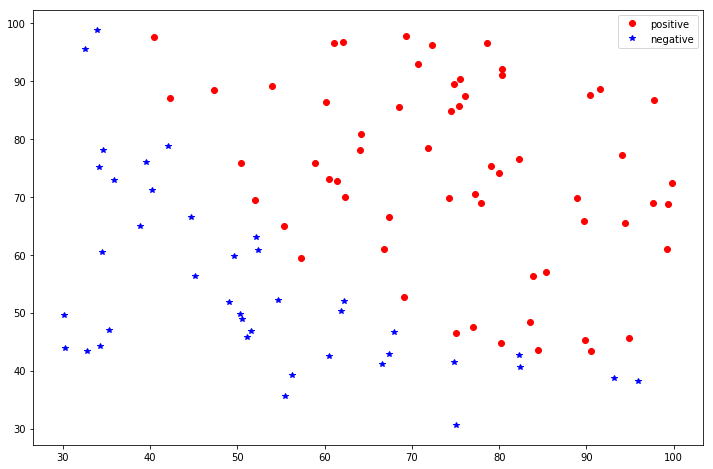

In [108]:
positive = data[data["admitted"].isin([1])]
negative = data[data["admitted"].isin([0])]

plt.figure(figsize=(12,8))
plt.plot(positive["exam1"], positive["exam2"], 'ro', label="positive")
plt.plot(negative["exam1"], negative["exam2"], 'b*', label="negative")
plt.legend()
plt.show()


In [109]:
theta = np.matrix(np.zeros(3))
X = data.iloc[:, 0:2]
y = data.iloc[:, 2:3]
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape, theta.shape

((100, 2), (100, 1), (1, 3))

In [110]:
X = np.insert(X, 0, 1, axis=1)
X.shape

(100, 3)

In [111]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [112]:
def cost(X, y, theta):
    m = len(y)
    first = np.multiply(np.log(sigmoid(X * theta.T)), -y)
    second = np.multiply(np.log(1 - sigmoid(X * theta.T)), (1 - y))
    return np.sum(first - second) / m  

In [113]:
val = cost(X, y, theta)
val

0.6931471805599453

In [114]:
def gradient_descent(X, y, theta, alpha, iters):
    m = len(y)
    cost_arr = []
    for i in range(iters):
        theta = theta - (alpha / m) * (sigmoid(X * theta.T) - y).T * X
    return theta

In [115]:
alpha = 0.001
iters = 600000
theta = gradient_descent(X, y, theta, alpha, iters)
theta

matrix([[-12.68403191,   0.10669959,   0.10066959]])

In [116]:
theta[0, 0]

-12.684031910642595

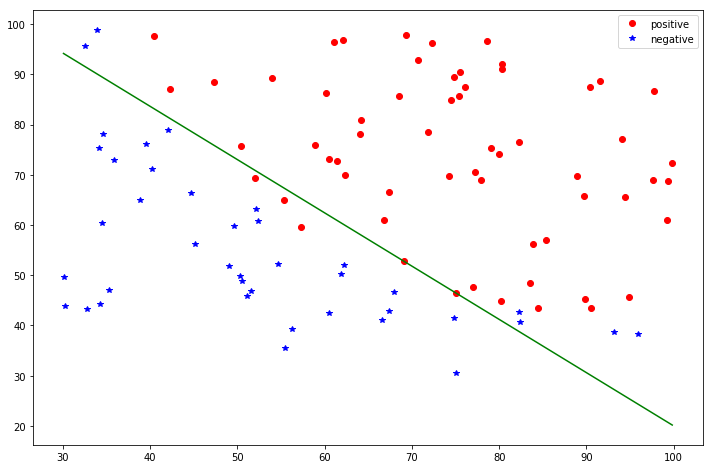

In [117]:
plt.figure(figsize=(12,8))
plt.plot(positive["exam1"], positive["exam2"], 'ro', label="positive")
plt.plot(negative["exam1"], negative["exam2"], 'b*', label="negative")
plt.legend()
x = np.linspace(data.exam1.min(), data.exam1.max(), 100)
y = -theta[0, 0]/theta[0, 2] - theta[0, 1]/theta[0, 2] * x
plt.plot(x, y, 'g-')
plt.show()